Econometría Aplicada. Lección 6
===============================

**Author:** Marcos Bujosa



<div class="abstract" id="org47cbc07">
<p>
En esta lección veremos tres funciones que describen las
características correspondientes a los momentos de segundo orden de
los procesos lineales: la función de autocorrelación (ACF), la función
de autocorrelación parcial (PACF) y la densidad espectral (estas tres
funciones son transformaciones de la función de autocovarianzas del
proceso). Veremos la estructura de estas funciones en procesos
lineales genéricos y luego particularizaremos a procesos de ruido
blanco, procesos MA y procesos AR.
</p>

</div>



$
\newcommand{\lag}{\mathsf{B}}
\newcommand{\Sec}[1]{\boldsymbol{#1}}
\newcommand{\Pol}[1]{\boldsymbol{#1}}
$



#### Carga de algunas librerías de R



Primero cargamos la librería `tfarima` (Repositorio Cran:
[https://cran.r-project.org/web/packages/tfarima/index.html](https://cran.r-project.org/web/packages/tfarima/index.html);
repositorio GitHub: [https://github.com/gallegoj/tfarima](https://github.com/gallegoj/tfarima))



In [1]:
library(tfarima)      # librería de José Luis Gallego para Time Series
library(readr)        # para leer ficheros CSV
library(ggplot2)      # para el scatterplot (alternaticamente library(tidyverse))
library(ggfortify)    # para pintar series temporales
library(jtools)       # para representación resultados estimación
library(zoo)          # para generar objetos ts (time series)

y además fijamos los parámetros por defecto para las figuras en `png`
del notebook



In [1]:
# fijamos el tamaño de las figuras que se generan en el notebook
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)

## Función de autocovarianzas y función de autocorrelación (ACF)



Sabemos que si un proceso estocástico es estacionario, la covarianza
entre $X_t$ y $X_{t+k}$ no depende de $t$; tan solo depende de la
distancia temporal $k$ entre ambas variables aleatorias:
$\;Cov(X_t,X_{t-k})=\gamma_k.\;$ También sabemos que

-   La secuencia $\boldsymbol{\gamma}=(\gamma_k\mid k\in\mathbb{Z})$ se denomina *función de
    autocovarianzas*
-   Dividiendo $\boldsymbol{\gamma}$ por $\gamma_0$ obtenemos la
    secuencia $\boldsymbol{\rho}=(\rho_k\mid k\in\mathbb{Z})$ donde
    $$\rho_k=\frac{Cov(X_t,X_{t-k})}{\sqrt{Var(X_t)Var(X_{t-k})}}=\frac{\gamma_k}{\gamma_0},$$
    
    que se denomina *función de autocorrelación* (ACF).



Veamos otras transformaciones de $\boldsymbol{\gamma}$ que subrayan
diferentes características de la interdependencia temporal en un
proceso estocástico.



## Función de autocorrelación parcial  (PACF)



La *correlación parcial* entre dos variables $X_t$ y $X_{t-k}$ de un
proceso estacionario $\boldsymbol{X}$ mide su correlación una vez
descontado el efecto de las variables $X_{t-1},\ldots X_{t-(k-1)}$ que
median entre ambas.
$$X_t,\ \overbrace{X_{t-1},\ldots X_{t-(k-1)},}\ X_{t-k}$$

Si denotamos con $\widehat{X_t}$ y $\widetilde{X_{t-k}}$ los ajustes de
las respectivas regresiones de $X_t$ y $X_{t-k}$ sobre $X_{t-1},\ldots
X_{t-(k-1)};\;$ la *correlación parcial* $\pi_k$ entre $X_t$ y $X_{t+k}$ es la
correlación entre los residuos de sendas regresiones:
$$\pi_k=Corr\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widetilde{X_{t-k}})\Big)$$



En un proceso débilmente estacionario las correlaciones parciales solo
dependen de la distancia $k$, lo que permite definir la siguiente
secuencia.

**La función de autocorrelación parcial** (PACF) de un proceso
estocástico estacionario $\boldsymbol{X}$ es la siguiente secuencia
$\boldsymbol{\pi}$ simétrica ($\pi_{-k}=\pi_k$):

$$\boldsymbol{\pi}=(\pi_k\mid k\in\mathbb{Z})=
\begin{cases} 
  \pi_0 & = \rho_0 ={\color{blue}{1}}\\\\ 
  \pi_1 &=Corr(X_t,\ X_{t-1})=\rho_1=\frac{\gamma_1}{\gamma_0}\\\\ 
  \pi_k &=Corr\Big((X_t-\widehat{X_t}),\ (X_{t-k}-\widetilde{X_{t-k}})\Big)
\end{cases},$$ 
donde $\widehat{X_t}$ y $\widetilde{X_{t-k}}$ son los ajustes de las
respectivas regresiones de $X_t$ y $X_{t-k}$ sobre $X_{t-1},\ldots
X_{t-(k-1)};\;$ i.e., las proyecciones ortogonales sobre
$\bar{sp}(1,X_{t-1},\ldots X_{t-(k-1)})$.



La magnitud de la correlación parcial $\;\pi_k\;$ **refleja la mejora
en la predicción de $\widehat{X_t}$ si** en lugar de usar una
combinación lineal con solo los $k-1$ primeros retardos,
$\widehat{X_t}=\widehat{\alpha_0}+\sum_{j=1}^{k-1}\widehat{\alpha_j}
X_{t-j}$, **empleamos $k$ retardos** (i.e., un retardo más).

(Dicha propiedad nos ayudará a elegir el orden de procesos autoregresivos).



Hay una correspondencia uno-a-uno entre la función de autocovarianzas
$\boldsymbol{\gamma}$ y la PACF $\boldsymbol{\pi}$. 

Es decir, es posible reconstruir una de las secuencias a partir de la
otra (por ejemplo resolviendo las [ecuaciones de Yule-Walker](./Lecc05.html#org392fab2)
recursivamente con el algoritmo [Levinson-Durbin](https://en.wikipedia.org/wiki/Levinson_recursion); véase
*Pourahmadi, M. (2001, Capítulo 7)* o *Brockwell & Davis (1991,
Capitulo 5)*)



Consecuentemente, la PACF $\boldsymbol{\pi}$ puede verse como una
reparametrización de la función de autocovarianzas
$\boldsymbol{\gamma}$.

Veamos otra transformación de $\boldsymbol{\gamma}$ que también
arrojará luz sobre las propiedades de un proceso estocástico.



## Densidad espectral



Si $\boldsymbol{X}$ es un proceso estocástico con función de
autocovarianzas $\boldsymbol{\gamma}\in\ell^1$, es decir, con función
de autocovarianzas absolutamente sumable,
$$\sum_{h\in\mathbb{Z}}|\gamma_h|<\infty,$$ entonces definimos la
*densidad espectral* de $\boldsymbol{X}$ como $$f(\omega)
\quad=\quad\frac{1}{2\pi}\sum_{h\in\mathbb{Z}}\gamma_h e^{-i h\omega}
\quad=\quad{\color{blue}{\frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega)}},\qquad
\omega\in[-\pi,\pi].$$



La *densidad espectral* $f(\omega)$ satisface las siguientes
propiedades:

1.  $f(\omega)=f(-\omega)$
2.  $f(\omega)\geq0$
3.  $\int_{-\pi}^\pi f(\omega)d\omega<\infty$



Es más, partiendo de la densidad espectral se pueden calcular las
covarianzas $$\gamma_h=\int_{-\pi}^\pi f(\omega)e^{-i
h\omega}d\omega;\quad h\in\mathbb{Z}$$



Consecuentemente, para $h=0$
$$\sigma^2=\gamma_0=\int_{-\pi}^\pi f(\omega)d\omega.$$

Por tanto podemos interpretar la densidad espectral como una
descomposición de la varianza oscilaciones de distintas frecuencias (o periodos).



($Periodo=\frac{1}{Frecuencia}$, donde la Frecuencia = Nº de ciclos por unidad de tiempo).



La ACF, la PACF y la *densidad espectral* son funciones que dependen
únicamente de los dos primeros momentos de la distribución.

Su estimación y posterior análisis son la herramienta fundamental para
elegir un modelo ARMA para una serie temporal *\`\`estacionaria''*.

Para entenderlo debemos ver cómo son estas funciones en algunos
modelos lineales concretos.



## ACF, PACF y densidad espectral de algunos modelos lineales



### Procesos lineales causales



Sea el proceso $\boldsymbol{X}=\boldsymbol{\psi}*\boldsymbol{U}$,
donde $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y
$\;\boldsymbol{\psi}\in\ell^2\;$ es una serie formal:
$$X_t=\sum_{j\geq0}\psi_j U_{t-j}.$$ Por la [lección anterior](./Lecc05.html#org8d85be3) sabemos
que $\;E(X_t)=0\;$ y que

-   $\boldsymbol{\gamma} \;=\; \sigma^2 \boldsymbol{\psi}(z)*\boldsymbol{\psi}(z^{-1})$



Es decir, 
$$\gamma_k = \sigma^2\sum_{j=0}^\infty \psi_{j+|k|}\cdot\psi_j.$$ 
Por otra parte, $\;\gamma_k\to0\;$ cuando $\;k\to\infty$



A partir de $\boldsymbol{\gamma}$ obtenemos las otras tres funciones:

**ACF**: $\;\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

**Dens. espectral**:  $\;f(\omega)=\frac{1}{2\pi}\sum_{h\geq0}\gamma_h\cos(h\omega)$

**PACF**: $\;\boldsymbol{\pi}\in\ell^2,\quad$ i.e., $\;\pi_k\to0\;$ cuando $\;k\to\infty$ 



### Proceso de Ruido Blanco



Sea $\boldsymbol{X}=1*\boldsymbol{U}$,
donde $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;;$ es decir $X_t=U_t$ para
$t\in\mathbb{Z}$. Entonces

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1z^0*1z^{0}) \;=\; \sigma^2z^0 \;=\; (\ldots,0,0,{\color{blue}{\sigma^2}},0,0,\ldots)$

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\;
      \frac{1}{\sigma^2}\boldsymbol{\gamma} \;=\; 1 z^0 \;=\;
      (\ldots,0,0,{\color{blue}{1}},0,0,\ldots)$

-   $f(\omega) \;=\; \frac{1}{2\pi}\sum_{h\geq0}\gamma_h \cos(h\omega) \;=\; \frac{\sigma^2}{2\pi} \cos(0\omega) \;=\; \frac{\sigma^2}{2\pi};\quad \omega\in[-\pi,\pi]$

-   $\boldsymbol{\pi} \;=\; 1 z^0 \;=\; (\ldots,0,0,{\color{blue}{1}},0,0,\ldots)$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
wn <- um(ar = "(1 - 0B)")
display(list(wn), lag.max = 20, byrow = TRUE)

![img](./img/lecc06/ACFwhitenoise.png)



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(wn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"), main="Ruido blanco")

![img](./img/lecc06/SimulWhitenoise.png)



### Proceso de media móvil MA($q$)



Sea $\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y donde $\boldsymbol{\theta}$
es un polinomio de orden $q>0$, con $\theta_0=1$ y
con todas sus raíces fuera del círculo unidad
$(\boldsymbol{\theta}^{-\triangleright}\in\ell^1)$, es decir $$X_t=
\sum_{j=1}^q\theta_j U_{t-j}+U_t.$$

Entonces $E(X_t)=0$ y

$\boldsymbol{\gamma} \;=\; \sigma^2 \boldsymbol{\theta}(z)*\boldsymbol{\theta}(z^{-1}) \;=\; \sigma^2 \sum\limits_{j=0}^q \theta_{j+k}\theta_{j} z^{k}\;$ (grado $q$ y cogrado $-q$) ([lección anterior](./Lecc05.html#org8d85be3))

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

$f(\omega) \;=\; \frac{\sigma^2}{2\pi}\boldsymbol{\theta}(e^{-i\omega})\cdot\boldsymbol{\theta}(e^{i\omega}) \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^q \gamma_h \cos(h\omega);\quad \omega\in[-\pi,\pi]\quad$ ($q$ cosenos $+1$)

$\boldsymbol{\pi}\;$ tiene grado $\infty$ y cogrado $-\infty\;$ y su magnitud decae paulatinamente cuando $\;k\to\infty$



### Proceso de media móvil MA($1$)



Sea $\boldsymbol{X}=(1-\theta z)*\boldsymbol{U}$ con $|\theta|<1$ y
con $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$, es decir $$X_t=U_t-\theta
U_{t-1}.$$

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1-\theta z)*(1-\theta z^{-1})
      \;=\; \sigma^2 (\ldots,\ 0\ ,\ -\theta,\
      {\color{blue}{(1+\theta^2)}},\ -\theta,\ 0,\ \ldots)$

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\;
      \frac{1}{\sigma^2(1+\theta^2)}\boldsymbol{\gamma}\;=\; (\ldots,\ 0\
      ,\ \frac{-\theta}{1+\theta^2},\ {\color{blue}{1}},\
      \frac{-\theta}{1+\theta^2},\ 0,\ \ldots)$

-   $f(\omega) \;=\;
      \frac{\sigma^2}{2\pi}\boldsymbol{\theta}(e^{-i\omega})\cdot\boldsymbol{\theta}(e^{i\omega})
      \;=\;
      \frac{\sigma^2}{2\pi}\Big((1+\theta^2)\;-\;2\theta\cos(\omega)\Big);\quad
      \omega\in[-\pi,\pi]$

-   $\boldsymbol{\pi} \;=\; \sum\limits_{k\in\mathbb{Z}}{  \frac{-\theta^k(1-\theta^2)}{1-\theta^{2(k+1)}} z^k}$



#### MA(1) con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma1p <- um(ma = "(1 - 0.9B)")
display(list(ma1p), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-0.9z\quad\Rightarrow\quad X_t=
(1-0.9 \mathsf{B})U_t\qquad {\color{blue}{(\theta>0)}}$$

![img](./img/lecc06/ACF-MA1p.png)



In [1]:
roots(ma1p)

raices-ma1p

1. 
   |     Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |----------+-----------+----------+-----------+--------+-------|
   | 1.111111 |         0 | 1.111111 |         0 |    Inf |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma1p, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA1p.png)



#### MA(1) con raíz negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma1n <- um(ma = "(1 + 0.9B)")
display(list(ma1n), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.9z\quad\Rightarrow\quad X_t=
(1+0.9 \mathsf{B})U_t\qquad {\color{blue}{(\theta<0)}}$$

![img](./img/lecc06/ACF-MA1n.png)



In [1]:
roots(ma1n)

raices-ma1n

1. 
   |      Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+-----------+----------+-----------+--------+-------|
   | -1.111111 |         0 | 1.111111 |       0.5 |      2 |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma1n, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA1n.png)



### Proceso de media móvil MA($2$)



Sea $\boldsymbol{X}=(1-\theta_1 z-\theta_2 z^2)*\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y con
$$\theta_1+\theta_2<1;\qquad \theta_2-\theta_1<1;\qquad |\theta_2|<1;\quad \text{(i.e., invertible)}$$
es decir $X_t=U_t-\theta_1 U_{t-1}-\theta_2 U_{t-2}$.

-   $\boldsymbol{\gamma} \;=\; \sigma^2 (1-\theta_1 z-\theta_2 z^2)*(1-\theta_1 z^{-1}-\theta_2 z^{-2})$
    
    $\gamma_0={\color{blue}{\sigma^2(1+\theta_1^2+\theta_2^2)}};\qquad$
    $\gamma_1=\sigma^2\big(-\theta_1(1-\theta_2)\big);\qquad$
    $\gamma_2=\sigma^2(-\theta_2)$
    
    $\gamma_3=\gamma_4=\cdots=0\qquad$ (y es simétrica)

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\; \frac{1}{\sigma^2(1+\theta_1^2+\theta_2^2)}\boldsymbol{\gamma}$

-   $f(\omega) \;=\;  \frac{\sigma^2}{2\pi}\Big((1+\theta_1^2+\theta_2^2)\;-\;2\theta_1(1+\theta_2)\cos(\omega)\;-\;2\theta_2\cos(2\omega)\Big)$

-   $\boldsymbol{\pi}$ tiene una expresión complicada, pero su magnitud
    decae paulatinamente.



#### MA(2) con $\theta_1>0$ y $\theta_2>0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2thpp <- um(ma = "(1 -0.6B - 0.3B^2)")
display(list(ma2thpp), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-0.6z -0.3z^2\quad\Rightarrow\quad X_t=
(1-0.6\mathsf{B}-0.3\mathsf{B}^2)U_t
\qquad {\color{blue}{(\theta_1>0 \;\text{y}\; \theta_2>0)}}$$

![img](./img/lecc06/ACF-MA2thpp.png)



In [1]:
roots(ma2thpp)

raices-ma2thpp

1. 
   |      Real |     Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+---------------+----------+-----------+--------+-------|
   |  1.081666 | -8.077936e-28 | 1.081666 |       0.0 |    Inf |     1 |
   | -3.081666 |  8.077936e-28 | 3.081666 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2thpp, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2thpp.png)



#### MA(2) con $\theta_1<0$ y $\theta_2<0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2thnn <- um(ma = "(1 +0.9B + 0.9B^2)")
display(list(ma2thnn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.9z+0.9z^2\quad\Rightarrow\quad X_t=
(1+0.9\mathsf{B}+0.9\mathsf{B}^2)U_t
\qquad {\color{blue}{(\theta_1<0 \;\text{y}\; \theta_2<0)}}$$

![img](./img/lecc06/ACF-MA2thnn.png)



In [1]:
roots(ma2thnn)

raices-ma2thnn

1. 
   | Real |  Imaginary |  Modulus | Frequency |   Period | Mult. |
   |------+------------+----------+-----------+----------+-------|
   | -0.5 |  0.9279607 | 1.054093 | 0.3286569 | 3.042687 |     1 |
   | -0.5 | -0.9279607 | 1.054093 | 0.3286569 | 3.042687 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2thnn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2thnn.png)



#### MA(2) con $\theta_1>0$ y $\theta_2<0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2thpn <- um(ma = "(1 -1.1B + 0.9B^2)")
display(list(ma2thpn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-1.1z +0.9z^2\quad\Rightarrow\quad X_t=
(1-1.1\mathsf{B}+0.9\mathsf{B}^2)U_t
\qquad {\color{blue}{(\theta_1>0 \;\text{y}\; \theta_2<0)}}$$

![img](./img/lecc06/ACF-MA2thpn.png)



In [1]:
roots(ma2thpn)

raices-ma2thpn

1. 
   |      Real | Imaginary |  Modulus | Frequency |   Period | Mult. |
   |-----------+-----------+----------+-----------+----------+-------|
   | 0.6111111 |  0.858868 | 1.054093 | 0.1515749 | 6.597397 |     1 |
   | 0.6111111 | -0.858868 | 1.054093 | 0.1515749 | 6.597397 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2thpn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2thpn.png)



#### MA(2) con $\theta_1<0$ y ${\theta_{2}}\textgreater0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2thnp <- um(ma = "(1 +0.6B - 0.3B^2)")
display(list(ma2thnp), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.6z-0.3z^2\quad\Rightarrow\quad X_t=
(1+0.6\mathsf{B}-0.3\mathsf{B}^2)U_t
\qquad {\color{blue}{(\theta_1<0 \;\text{y}\; \theta_2>0)}}$$

![img](./img/lecc06/ACF-MA2thnp.png)



In [1]:
roots(ma2thnp)

raices-ma2thnp

1. 
   |      Real |     Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+---------------+----------+-----------+--------+-------|
   |  3.081666 |  3.831501e-21 | 3.081666 |       0.0 |    Inf |     1 |
   | -1.081666 | -3.831501e-21 | 1.081666 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2thnp, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2thnp.png)



#### MA(2) con dos raíces reales, una positiva y la otra negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2pn <- um(ma = "(1 - 0.64B^2)")
display(list(ma2pn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-0.64z^2\quad\Rightarrow\quad X_t=
(1-0.64\mathsf{B}^2)U_t
\qquad {\color{blue}{(\text{raices reales: +, -})}}$$

![img](./img/lecc06/ACF-MA2pn.png)



In [1]:
roots(ma2pn)

raices-ma2pn

1. 
   |  Real | Imaginary | Modulus | Frequency | Period | Mult. |
   |-------+-----------+---------+-----------+--------+-------|
   |  1.25 |         0 |    1.25 |       0.0 |    Inf |     1 |
   | -1.25 |         0 |    1.25 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2pn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2pn.png)



#### MA(2) con un par de raíces complejas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2np <- um(ma = "(1 + 0.64B^2)")
display(list(ma2np), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+0.64z^2\quad\Rightarrow\quad X_t=
(1+0.64\mathsf{B}^2)U_t
\qquad {\color{blue}{(\text{par de raices complejas})}}$$

![img](./img/lecc06/ACF-MA2np.png)



In [1]:
roots(ma2np)

raices-ma2np

1. 
   | Real | Imaginary | Modulus | Frequency | Period | Mult. |
   |------+-----------+---------+-----------+--------+-------|
   |    0 |      1.25 |    1.25 |      0.25 |      4 |     1 |
   |    0 |     -1.25 |    1.25 |      0.25 |      4 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2np, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2np.png)



#### MA(2) con dos raíces reales y negativas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2rojo <- um(ma = "(1 + 1.6B + .64B^2 )")
display(list(ma2rojo), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1+1.6z+0.64z^2\quad\Rightarrow\quad X_t=
(1+1.6\mathsf{B}+0.64\mathsf{B}^2)U_t
\qquad {\color{blue}{(\text{r. reales: -, -})}}$$

![img](./img/lecc06/ACF-MA2rojo.png)



In [1]:
roots(ma2rojo)

raices-ma2rojo

1. 
   |  Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |-------+---------------+---------+-----------+--------+-------|
   | -1.25 | -1.110223e-16 |    1.25 |       0.5 |      2 |     2 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2rojo, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2rojo.png)



#### MA(2) con dos raíces reales y positivas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ma2violeta <- um(ma = "(1 - 1.6B + .64B^2 )")
display(list(ma2violeta), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\theta}(z)=1-1.6z+0.64z^2\quad\Rightarrow\quad X_t=
(1-1.6\mathsf{B}+0.64\mathsf{B}^2)U_t
\qquad {\color{blue}{(\text{r. reales: +, +})}}$$

![img](./img/lecc06/ACF-MA2violeta.png)



In [1]:
roots(ma2violeta)

raices-ma2violeta

1. 
   | Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |------+---------------+---------+-----------+--------+-------|
   | 1.25 | -2.775558e-16 |    1.25 |         0 |    Inf |     2 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2violeta, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-MA2violeta.png)



### Proceso autorregresivo AR($p$)



Sea $\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{U}$, con
$\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y donde $\boldsymbol{\phi}$ es
un polinomio de grado $p>0$ con $\phi_0=1$. Entonces
$$(\boldsymbol{\phi}*\boldsymbol{X})_t=\boldsymbol{\phi}(\mathsf{B})X_t=
(1+\phi_1\mathsf{B}+\phi_2\mathsf{B}^2+\cdots+\phi_p\mathsf{B}^p)X_t=
U_t$$ Y por tanto $$X_t= U_t-\sum_{j=1}^p\phi_j X_{t-j}.$$



Si todas las raíces del polinomio $\boldsymbol{\phi}$ (de grado $p$)
están fuera del círculo unidad, es decir, si *el polinomio AR es
\`\`invertible''*
$\;(\boldsymbol{\phi}^{-\triangleright}=\boldsymbol{\phi}^{-1}\in\ell^1)\;$
entonces $\boldsymbol{X}$ tiene una representación como proceso lineal
causal MA($\infty$): $$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{U}
\quad\Rightarrow\quad
\boldsymbol{X}=\frac{1}{\boldsymbol{\phi}}*\boldsymbol{U}
\quad\Rightarrow\quad X_t = U_t + \sum_{j=1}^\infty\psi_j U_{t-j};$$
donde $\;\boldsymbol{\phi}^{-1}=\boldsymbol{\psi}=({\color{blue}1},\
\psi_1,\ \psi_2,\ \psi_3,\ldots)\;$ tiene grado $\infty$.



Por tanto $E(X_t)=0$ para todo $t\in\mathbb{Z}$ y

$\boldsymbol{\gamma} \;=\; \sigma^2 \frac{1}{\boldsymbol{\phi}(z)}*\frac{1}{\boldsymbol{\phi}(z^{-1})} \;=\; \sigma^2 \sum\limits_{j,k=0}^\infty \psi_{j+k}\psi_j z^{j}\quad$ (grado $\infty$)$\quad$ ([Ec. de Yule-Walker](Lecc05.html#org392fab2))

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

$f(\omega) =
  \frac{\sigma^2}{2\pi}\frac{1}{\boldsymbol{\phi}(e^{-i\omega})\cdot\boldsymbol{\phi}(e^{i\omega})}
  \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^\infty \gamma_h
  \cos(h\omega);\quad$ donde $\omega\in[-\pi,\pi]$.

(suma infinita de cosenos)



Pero la PACF, $\;\boldsymbol{\pi},\;$ es una secuencia
con grado $p$ y cogrado $-p$ ([demo en los apuntes](./Lecc06.pdf#subsubsection.4.6.1)).



#### Demostración de que la PACF tiene cogrado $-p$ y grado $p$



-   Sea $\boldsymbol{X}$ un proceso causal AR($p$): $\quad
      X_t\;=\;\sum\limits_{j=1}^p\phi_j X_{t-j}+U_t$
-   La proyección de $X_{k+1}$ sobre el espacio $\bar{sp}(X_{2}:X_k)$
    generado por $X_2,\ldots X_k$ (con $k>p$) es:
    $$\widehat{X_{k+1}}=P_{\bar{sp}(X_{2}:X_k)}(X_{k+1})=\sum_{j=1}^p\phi_j X_{k+1-j}$$
-   De su representación MA($\infty$): $\;Y\in\bar{sp}(X_{2}:X_k)
      \;\Rightarrow\; Y\in\bar{sp}(U_j\mid{j\leq k})$, pues
    $$X_t\;=\;\sum\limits_{j=0}^{\infty} \psi_j U_{t-j}
      \quad\Rightarrow\quad
      \bar{sp}(X_{2}:X_k)\subset\bar{sp}(U_j\mid{j\leq k}) \; \perp \; U_{k+1}$$
-   Si $Y\in\bar{sp}(X_{2}:X_k)$ entonces $Cov\Big((X_{k+1}-\widehat{X_{k+1}}), Y\Big)=Cov(U_{k+1}, Y)=0$
-   Denotemos con $\widetilde{X_{1}}$ a la proyección
    $P_{\bar{sp}(X_{2}:X_k)}(X_{1})$ de $X_1$ sobre
    $\bar{sp}(X_{2}:X_k)$
-   Ahora es fácil ver que $\pi_k=0$ para $k>p$, pues
    
    \begin{eqnarray*}
     \pi_k 
     = & Corr\Big((X_{k+1}-\widehat{X_{k+1}}),(X_{1}-\widetilde{X_{1}})\Big)\\
     = & Corr\Big(U_{k+1},(X_{1}-\widetilde{X_{1}})\Big) \; = \; 0
    \end{eqnarray*}
    
    ya que $U_{k+1}\perp(X_{1}-\widetilde{X_{1}}) \in \bar{sp}(U_j\mid{j\leq k})$.



### Proceso autorregresivo AR($1$)



Sea $\;(1-\phi z)*\boldsymbol{X}=\boldsymbol{U},\quad$ con
$\;|\phi|<1\;$ y con $\;\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$, es
decir $$X_t=\phi X_{t-1} + U_t.$$



como $\;\boldsymbol{X}=(1-\phi z)^{-1}*\boldsymbol{U},\quad$ tenemos que

$\boldsymbol{\gamma} \;=\; \sigma^2 (1-\phi z)^{-1}*(1-\phi
  z^{-1})^{-1} \;=\; \frac{\sigma^2}{1-\phi^2}
  \sum\limits_{k=-\infty}^\infty \phi^{|k|} z^k\qquad$ grado $\infty$ y cogrado $-\infty$

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma} \;=\;
  \frac{1+\phi^2}{\sigma^2}\boldsymbol{\gamma} \;=\;
  \sum\limits_{j=-\infty}^\infty \phi^{|j|} z^j \quad\Rightarrow\quad
  \rho_k=\phi^k$ para $k\geq0$.

$f(\omega) \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^\infty \gamma_h
  \cos(h\omega)=\frac{\sigma^2}{2\pi}\frac{1}{1+\phi^2-2\phi\cos(\omega)}\;$ (compárese con MA($1$)).

$\boldsymbol{\pi} \;=\; (\ldots,\; 0,\; 0,\; \phi,\; {\color{blue}1},\; \phi,\; 0,\; 0,\;\ldots)\qquad$ grado $1$ y cogrado $-1$



#### AR(1) con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar1p <- um(ar = "(1 - 0.9B)")
display(list(ar1p), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1-0.9z\quad\Rightarrow\quad X_t=0.9X_{t-1}+U_t\qquad {\color{blue}{(\phi>0)}}$$

![img](./img/lecc06/ACF-AR1p.png)



In [1]:
roots(ar1p)

raices-ar1p

1. 
   |     Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |----------+-----------+----------+-----------+--------+-------|
   | 1.111111 |         0 | 1.111111 |         0 |    Inf |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar1p, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR1p.png)



#### AR(1) con raíz negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar1n <- um(ar = "(1 + 0.9B)")
display(list(ar1n), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+0.9z\quad\Rightarrow\quad X_t=-0.9X_{t-1}+U_t\qquad {\color{blue}{(\phi<0)}}$$

![img](./img/lecc06/ACF-AR1n.png)



In [1]:
roots(ar1n)

raices-ar1n

1. 
   |      Real | Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+-----------+----------+-----------+--------+-------|
   | -1.111111 |         0 | 1.111111 |       0.5 |      2 |     1 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar1n, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR1n.png)



### Proceso autorregresivo AR($2$)



Sea $\quad(1-\phi_1 z-\phi_2 z^2)*\boldsymbol{X}=\boldsymbol{U},\quad$
con $\;\boldsymbol{U}\sim WN(0,\sigma^2)\;$ y con
$$\phi_1+\phi_2<1;\qquad \phi_2-\phi_1<1;\qquad |\phi_2|<1;\quad
\text{(i.e., estacionario)}$$ es decir $$X_t=\phi_1 X_{t-1} + \phi_2
X_{t-2} + U_t.$$ Entonces

$\boldsymbol{\gamma}=\sigma^2\left(
  \frac{1}{\boldsymbol{\phi}(z)}*\frac{1}{\boldsymbol{\phi}(z^-1)}\right)\qquad$

$\boldsymbol{\rho} \;=\;
\frac{1}{\gamma_0}\boldsymbol{\gamma}\qquad$
(Verifica Ec. Yule-Walker:
$\;\rho_k=\phi_1\rho_{k-1}+\phi_2\rho_{k-2};\;\qquad$ decae)

$f(\omega) \;=\;  \frac{\sigma^2}{2\pi}\frac{1}{1+\phi_1^2+\phi_2^2-2\phi_1(1+\phi_2)\cos(\omega)-2\phi_2\cos(2\omega)}$

$\boldsymbol{\pi} \;=\; (\ldots,\; 0,\; \phi_2,\; \frac{\phi_1}{1-\phi_2},\; {\color{blue}1},\; \frac{\phi_1}{1-\phi_2},\; \phi_2,\; 0,\;\ldots)$ 



#### AR(2) con $\phi_1>0$ y $\phi_2>0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2phpp <- um(ar = "(1 -0.6B - 0.3B^2)")
display(list(ar2phpp), lag.max = 20, byrow = TRUE) #, log.spec = TRUE

$$\boldsymbol{\phi}(z)=1-0.6z -0.3z^2\quad\Rightarrow\quad
(1-0.6\mathsf{B}-0.3\mathsf{B}^2)X_t= U_t \qquad
{\color{blue}{(\phi_1>0 \;\text{y}\; \phi_2>0)}}$$

![img](./img/lecc06/ACF-AR2phpp.png)



In [1]:
roots(ar2phpp)

raices-ar2phpp

1. 
   |      Real |     Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+---------------+----------+-----------+--------+-------|
   |  1.081666 | -8.077936e-28 | 1.081666 |       0.0 |    Inf |     1 |
   | -3.081666 |  8.077936e-28 | 3.081666 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2phpp, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2phpp.png)



#### AR(2) con $\phi_1<0$ y $\phi_2<0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2phnn <- um(ar = "(1 +0.9B + 0.9B^2)")
display(list(ar2phnn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+0.9z+0.9z^2\quad\Rightarrow\quad
(1+0.9\mathsf{B}+0.9\mathsf{B}^2)X_t= U_t \qquad
{\color{blue}{(\phi_1<0 \;\text{y}\; \phi_2<0)}}$$

![img](./img/lecc06/ACF-AR2phnn.png)



In [1]:
roots(ar2phnn)

raices-ar2phnn

1. 
   | Real |  Imaginary |  Modulus | Frequency |   Period | Mult. |
   |------+------------+----------+-----------+----------+-------|
   | -0.5 |  0.9279607 | 1.054093 | 0.3286569 | 3.042687 |     1 |
   | -0.5 | -0.9279607 | 1.054093 | 0.3286569 | 3.042687 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2phnn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2phnn.png)



#### AR(2) con $\phi_1>0$ y $\phi_2<0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2phpn <- um(ar = "(1 -1.1B + 0.9B^2)")
display(list(ar2phpn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1-1.1z +0.9z^2\quad\Rightarrow\quad
(1-1.1\mathsf{B}+0.9\mathsf{B}^2)X_t= U_t \qquad
{\color{blue}{(\phi_1>0 \;\text{y}\; \phi_2<0)}}$$

![img](./img/lecc06/ACF-AR2phpn.png)



In [1]:
roots(ar2phpn)

raices-ar2phpn

1. 
   |      Real | Imaginary |  Modulus | Frequency |   Period | Mult. |
   |-----------+-----------+----------+-----------+----------+-------|
   | 0.6111111 |  0.858868 | 1.054093 | 0.1515749 | 6.597397 |     1 |
   | 0.6111111 | -0.858868 | 1.054093 | 0.1515749 | 6.597397 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2phpn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2phpn.png)



#### AR(2) con $\phi_1<0$ y ${\phi_{2}}\textgreater0$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2phnp <- um(ar = "(1 +0.6B - 0.3B^2)")
display(list(ar2phnp), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+0.6z-0.3z^2\quad\Rightarrow\quad
(1+0.6\mathsf{B}-0.3\mathsf{B}^2)X_t= U_t \qquad
{\color{blue}{(\phi_1<0 \;\text{y}\; \phi_2>0)}}$$

![img](./img/lecc06/ACF-AR2phnp.png)



In [1]:
roots(ar2phnp)

raices-ar2phnp

1. 
   |      Real |     Imaginary |  Modulus | Frequency | Period | Mult. |
   |-----------+---------------+----------+-----------+--------+-------|
   |  3.081666 |  3.831501e-21 | 3.081666 |       0.0 |    Inf |     1 |
   | -1.081666 | -3.831501e-21 | 1.081666 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2phnp, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2phnp.png)



#### AR(2) con dos raíces reales, una positiva y la otra negativa



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2pn <- um(ar = "(1 + 0.1B - 0.8B^2)")
display(list(ar2pn), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+0.1z-0.8z^2\quad\Rightarrow\quad
(1+.1\mathsf{B}-.8\mathsf{B}^2)X_t = U_t \qquad
{\color{blue}{(\text{raices reales: +, -})}}$$

![img](./img/lecc06/ACF-AR2pn.png)



In [1]:
roots(ar2pn)

raices-ar2pn

1. 
   |     Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |----------+---------------+---------+-----------+--------+-------|
   |  1.18228 |  7.754818e-26 | 1.18228 |       0.0 |    Inf |     1 |
   | -1.05728 | -7.754818e-26 | 1.05728 |       0.5 |      2 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2pn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2pn.png)



#### AR(2) con un par de raíces complejas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2np <- um(ar = "(1 - 0.1B + 0.8B^2)")
display(list(ar2np), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1-0.1z+0.8z^2\quad\Rightarrow\quad
 (1-.1\mathsf{B}+.8\mathsf{B}^2)X_t = U_t \qquad
 {\color{blue}{(\text{par de r. complejas})}}$$

![img](./img/lecc06/ACF-AR2np.png)



In [1]:
roots(ar2np)

raices-ar2np

1. 
   |   Real | Imaginary |  Modulus | Frequency |   Period | Mult. |
   |--------+-----------+----------+-----------+----------+-------|
   | 0.0625 |  1.116286 | 1.118034 | 0.2410983 | 4.147685 |     1 |
   | 0.0625 | -1.116286 | 1.118034 | 0.2410983 | 4.147685 |     1 |
   #+caption: A matrix: 2 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2np, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

c![img](./img/lecc06/Sim-AR2np.png)



#### AR(2) con dos raíces reales y negativas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2azul <- um(ar = "(1 + 1.6B + .64B^2 )")
display(list(ar2azul), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1+1.6z+0.64z^2\quad\Rightarrow\quad 
(1+1.6\mathsf{B}+.64\mathsf{B}^2)X_t = U_t \quad
{\color{blue}{(\text{raices reales: -, -})}}$$

![img](./img/lecc06/ACF-AR2azul.png)



In [1]:
roots(ar2azul)

raices-ar2azul

1. 
   |  Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |-------+---------------+---------+-----------+--------+-------|
   | -1.25 | -1.110223e-16 |    1.25 |       0.5 |      2 |     2 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2azul, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2azul.png)



#### AR(2) con dos raíces reales y positivas



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
ar2rojo <- um(ar = "(1 - 1.6B + .64B^2 )")
display(list(ar2rojo), lag.max = 20, byrow = TRUE)

$$\boldsymbol{\phi}(z)=1-1.6z+.64z^2\quad\Rightarrow\quad 
(1-1.6\mathsf{B}+.64\mathsf{B}^2)X_t = U_t \quad
{\color{blue}{(\text{raices reales: +, +})}}$$

![img](./img/lecc06/ACF-AR2rojo.png)



In [1]:
roots(ar2rojo)

raices-ar2rojo

1. 
   | Real |     Imaginary | Modulus | Frequency | Period | Mult. |
   |------+---------------+---------+-----------+--------+-------|
   | 1.25 | -2.775558e-16 |    1.25 |         0 |    Inf |     2 |
   #+caption: A matrix: 1 × 6 of type dbl

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ar2rojo, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc06/Sim-AR2rojo.png)



## (Resumen) características de procesos MA($q$)



<u>Siempre estacionario.</u>

Para ser invertible raíces $\boldsymbol{\theta}$ fuera del círculo
unidad
$(\boldsymbol{\theta}^{-\triangleright}=\boldsymbol{\theta}^{-1}\in\ell^1)$

**Tipos de representación del proceso**

-   **Como suma ponderada finita:** (número finito de parámetros)
    $$\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}
      \quad\Rightarrow\quad X_t=\boldsymbol{\theta}(\mathsf{B})U_t$$
-   **Como suma ponderada infinita:** (<u>solo existe si es invertible</u>):
    $$\frac{1}{\boldsymbol{\theta}}*\boldsymbol{X}=\boldsymbol{U}
      \quad\Rightarrow\quad
      \frac{1}{\boldsymbol{\theta}}(\mathsf{B})X_t=U_t$$

**ACF ($\boldsymbol{\rho}$):** Grado ($q$) y cogrado ($-q$)

**PACF ($\boldsymbol{\pi}$):** Grado ($\infty$) y cogrado ($-\infty$):
exponenciales y/o sinusoidales amortiguadas.

**Densidad espectral** proporcional al inverso de la densidad espectral
  de $\;\boldsymbol{\theta}*\boldsymbol{X}=\boldsymbol{U}$



## (Resumen) características de procesos AR($p$)



<u>Siempre invertible.</u>

Para ser estacionario raíces de $\boldsymbol{\phi}$ fuera del círculo
unidad
$(\boldsymbol{\phi}^{-\triangleright}=\boldsymbol{\phi}^{-1}\in\ell^1)$

**Tipos de representación del proceso**

-   **Como suma ponderada finita:** (número finito de parámetros)
    $$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{U}
      \quad\Rightarrow\quad \boldsymbol{\phi}(\mathsf{B})X_t=U_t$$
-   **Como suma ponderada infinita:** (<u>solo si es estacionario</u>)
    $$\boldsymbol{X}=\frac{1}{\boldsymbol{\phi}}*\boldsymbol{U}
      \quad\Rightarrow\quad
      X_t=\frac{1}{\boldsymbol{\phi}}(\mathsf{B})U_t$$

**ACF ($\boldsymbol{\rho}$):** Grado ($\infty$) y cogrado ($-\infty$): 
exponenciales y/o sinusoidales amortiguadas.

**PACF ($\boldsymbol{\pi}$):** Grado ($p$) y cogrado ($-p$)

**Densidad espectral** proporcional al inverso de la densidad espectral
de $\boldsymbol{X}=\boldsymbol{\phi}*\boldsymbol{U}$



## Nota final



Se puede demostrar que

-   si un proceso tiene una ACF $\boldsymbol{\rho}$ con cogrado $-q$ y grado $q$, es un proceso MA($q$)
-   si un proceso tiene una PACF $\boldsymbol{\pi}$ con cogrado $-p$ y grado $p$, es un proceso AR($p$)

Véase *Pourahmadi M. (2001).*

Consecuentemente, que la ACF o la PACF se corten \`\`bruscamente'' nos
indica que el modelo es AR o MA (además de su grado).

Desgraciadamente para los modelos ARMA (qué veremos más adelante)
tanto la ACF como la PACF tienen infinitos términos no nulos, por lo
que su identificación no es tan sencilla.


| |<b>ACF finita</b>|<b>ACF persistente</b>|
|---|---|---|
| <b>PACF finita</b>|<u>Ruido blanco</u>: retardos conjuntamente NO significativos|<u>AR</u>: orden indicado por la PACF|
| <b>PACF persistente</b>|<u>MA</u>: orden indicado por la ACF|<u>ARMA</u>|



Consideremos un proceso AR($p$): $\quad X_t=\sum\limits_{j=1}^p\phi_j
X_{t-j}+U_t;\qquad U_t\sim WN(0,\sigma^2)$



Multiplicando ambos lados por $X_{t-k}$ para $0\leq k\leq p$ y tomando
esperanzas tenemos $$Cov(X_t,X_{t-k})=\sum_{j=1}^p\phi_j
Cov(X_{t-j},X_{t-k})+ Cov(U_t,X_{t-k});\qquad 0\leq k\leq p.$$



Para $\;k=0\;$ tenemos:

\begin{equation}
  \label{eqYuleW1}
  \sigma^2=\gamma_0-\sum_{j=1}^p\phi_j\gamma_j
\end{equation}



Para $\;1\leq k\leq p\;$ tenemos:



\begin{equation}
  \label{eqYuleW2}
  \gamma_k=\sum_{j=1}^p\phi_j\gamma_{k-j}
\end{equation}



Dividiendo [(1)](eqref:eqYuleW1) y [(2)](eqref:eqYuleW2) por $\gamma_0$ (y operando en ([1](ref:eqYuleW1)) tenemos

\begin{equation}
  \label{eqYuleW3}
  \gamma_0=\frac{\sigma^2}{1-\phi_1\rho_1-\cdots-\phi_p\rho_p};
  \qquad
  \rho_k=\phi_1\rho_{k-1}+\cdots+\phi_p\rho_{k-p}
\end{equation}



1. 
   | Real      | Imaginary     | Modulus  | Frequency | Period | Mult. |
   |-----------+---------------+----------+-----------+--------+-------|
   | 3.081666  | 3.831501e-21  | 3.081666 | 0.0       | Inf    | 1     |
   | -1.081666 | -3.831501e-21 | 1.081666 | 0.5       | 2      | 1     |
   #+caption: A matrix: 2 × 6 of type dbl
#+attr_org: :width 1200 :height 200

#+attr_org: :width 1200 :height 500


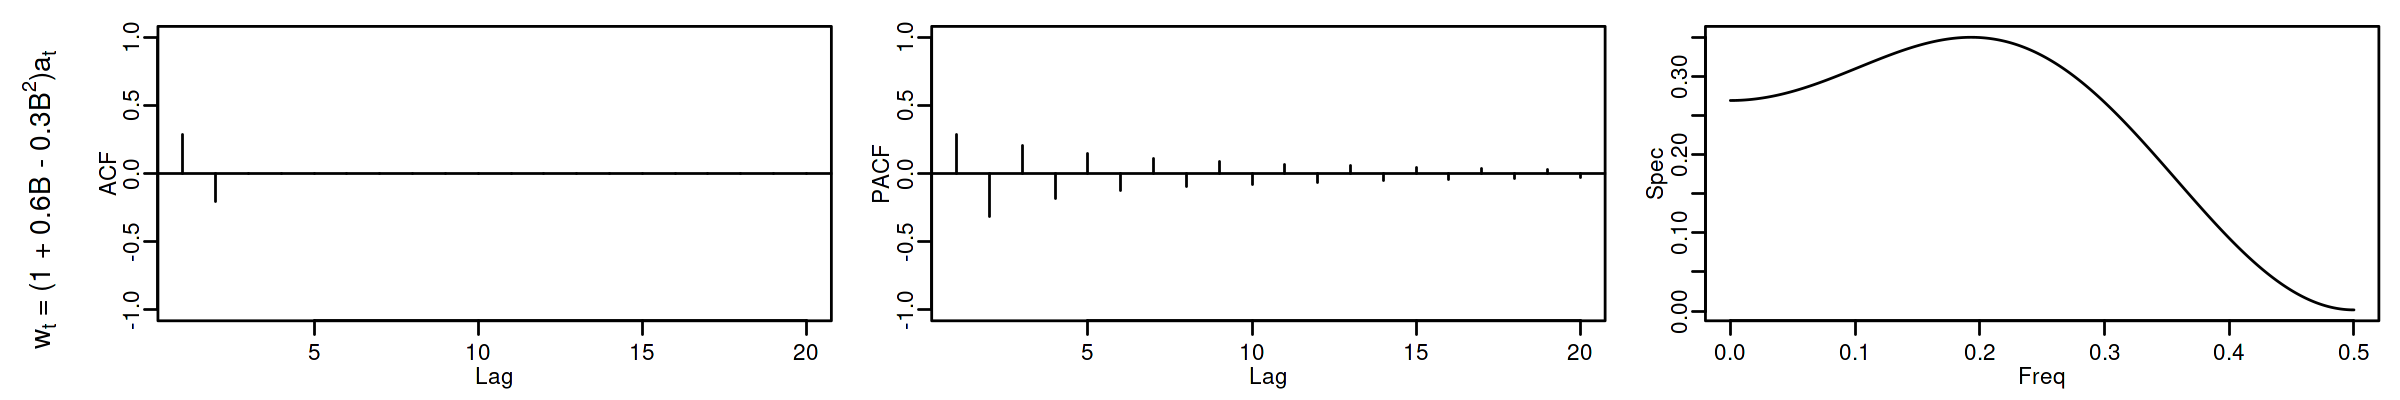

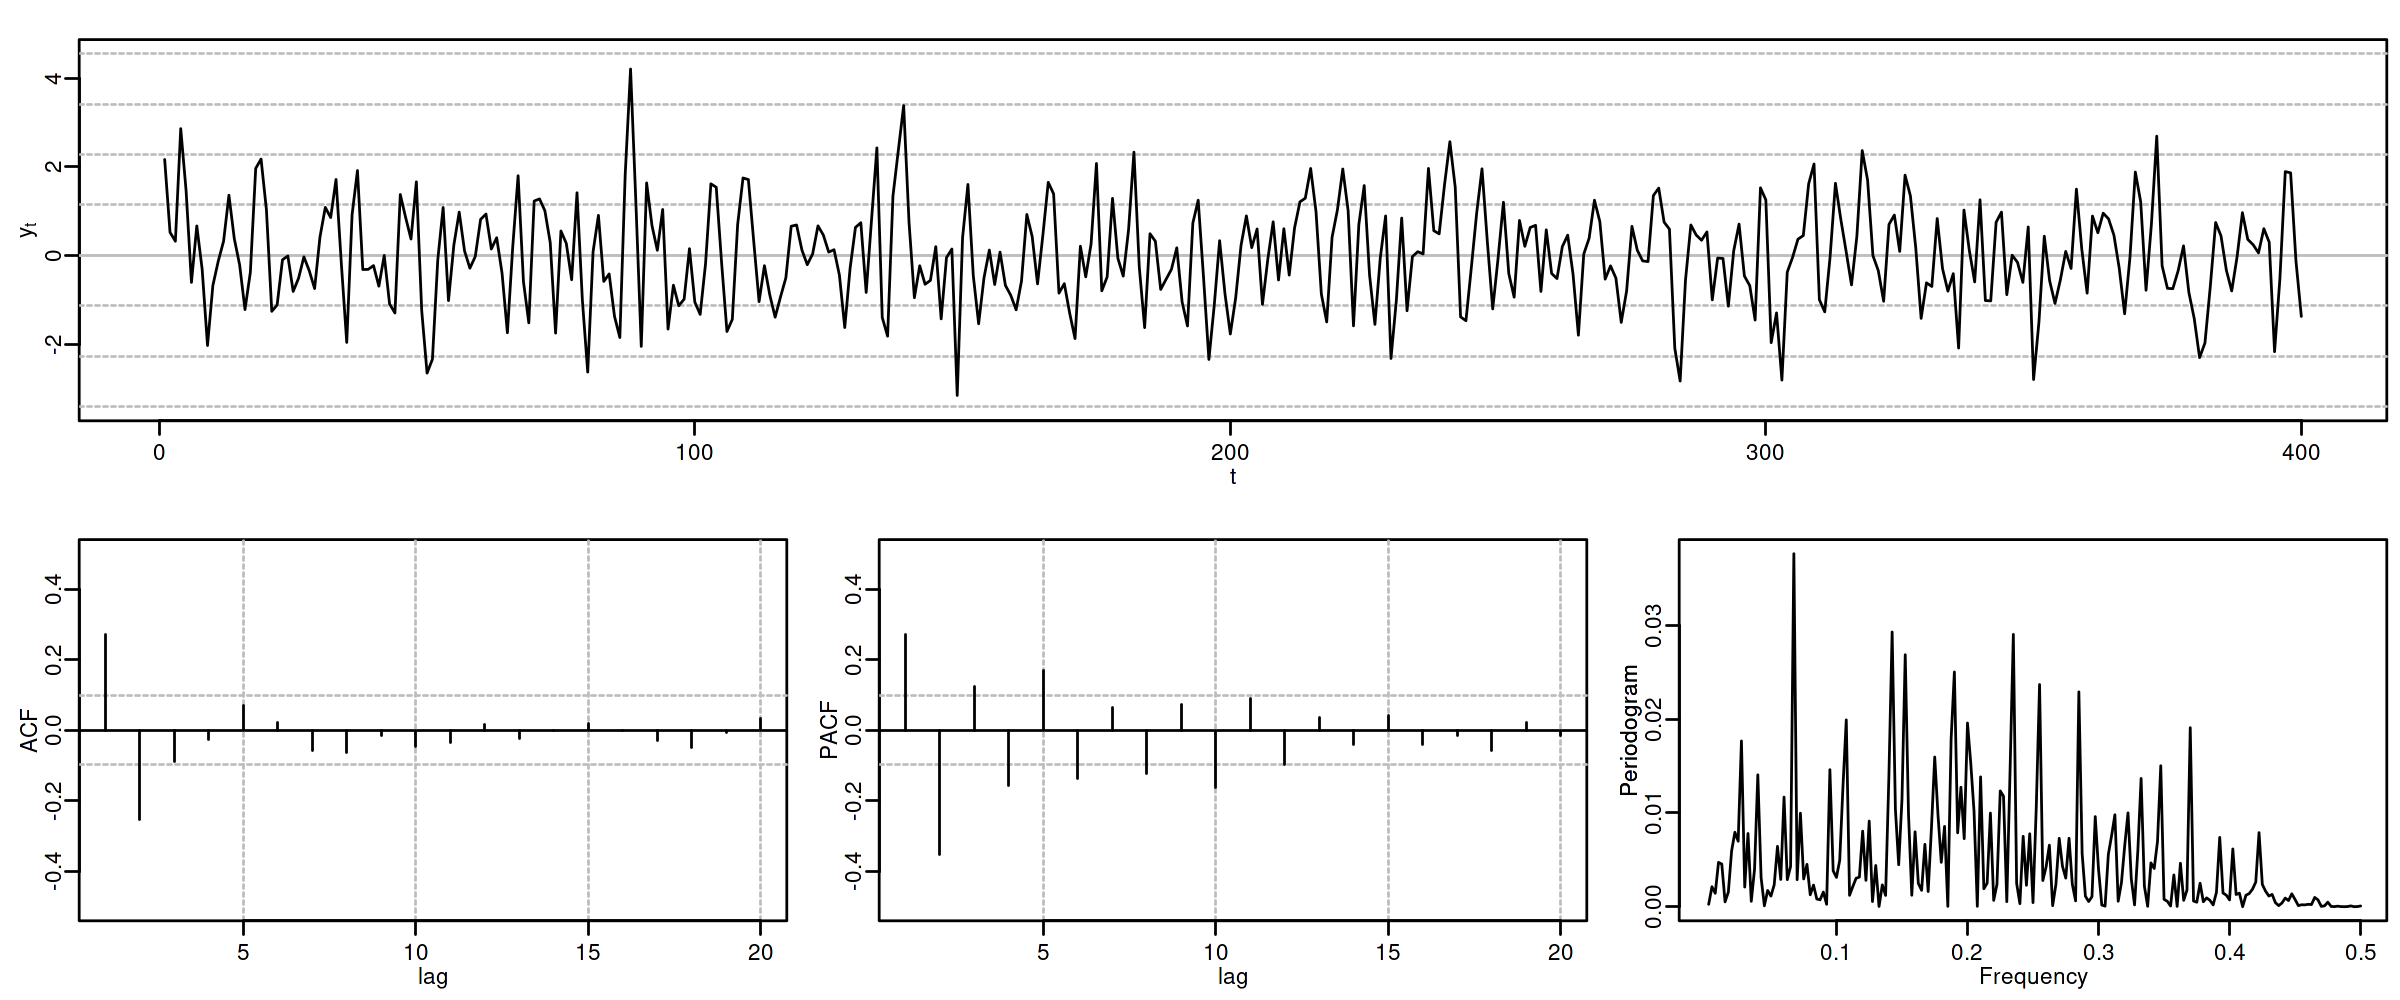

In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
#ma2pn <- um(ma = "(1  -1B + 0.5B^2)")
ma2pn <- um( ma = "(1  +0.6B - .3B^2)")
#ma2pn <- um(ma = "(1  -0B + .64B^2)")
#ma2pn <- um(ma = "(1  - .8B^2)")
display(list(ma2pn), lag.max = 20, byrow = TRUE)
roots(ma2pn)
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(ma2pn, n = 400), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"))